In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#9370da']
colors_light = ['#fecfcf','#8ec7fe','#c8b7ec']

In [86]:
!head ../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat

#L=12, N=12, l=6, U/t=3.300000, num_replicas=1 
# betas    tau_K         tau_K_err          tau_V          tau_V_err 
2.000000 230.75000000 5.41830874 245.57500000 5.32710929
4.000000 366.30000000 8.63312358 383.65000000 8.06553654
8.000000 582.60000000 13.20563506 601.88750000 12.14001900
16.000000 1008.43750000 21.58268501 1057.28750000 26.30100947
32.000000 2123.27500000 90.83962773 2225.35000000 106.73519240


In [87]:
betas_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,0]
tau_kinetic_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,1]
tau_kineticErr_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,2]

betas_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,0]
tau_kinetic_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,1]
tau_kineticErr_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,2]

In [88]:
tau_potential_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,3]
tau_potentialErr_truncated = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_truncated.dat")[:,4]

tau_potential_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,3]
tau_potentialErr_uniform = np.loadtxt("../processed_data/1D_12_12_6_3.300000_1.000000_betas_1_energies_square_autocorrs_uniform.dat")[:,4]

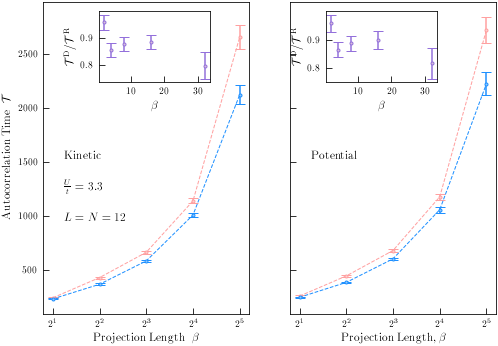

In [103]:
with plt.style.context('../IOP_large.mplstyle3'):

    # Kinetic energies subplot
    fig, ax = plt.subplots(1,2,sharey=True,sharex=True)
    #plt.subplots_adjust(wspace=0.02)

    
    #plt.title(r"$\rm{Projection\;Length\;Dependence}$", x=0.00, pad=-14)
    
    ax[0].set_xscale("log",base=2)

    ax[0].errorbar(betas_uniform,tau_kinetic_uniform,tau_kineticErr_uniform, fmt='.', 
                 capsize=5,label="Rejection",color=colors[0],
                 mfc=colors_light[0],zorder=1)
    ax[0].plot(betas_uniform,tau_kinetic_uniform, ls='--', 
                 lw=1,color=colors[0],zorder=1)
    ax[0].errorbar(betas_truncated,tau_kinetic_truncated,tau_kineticErr_truncated, fmt='.', 
                 capsize=5,label="Direct",color=colors[1],
                 mfc=colors_light[1],zorder=1)
    ax[0].plot(betas_truncated,tau_kinetic_truncated, ls='--', 
                 lw=1,color=colors[1],zorder=1)
    ax[0].tick_params(direction='in')
    ax[0].set_ylabel(r"$\rm{Autocorrelation\;Time}\;\; \mathcal{T}$")
    ax[0].set_xlabel(r"$\rm{Projection\;Length}\;\; \beta$")
    ax[0].tick_params(direction='in')
    ax[0].annotate(r"$\rm{Kinetic}$",(0.10,0.50),xycoords="axes fraction")
    ax[0].annotate(r"$\frac{U}{t} = 3.3$",(0.10,0.40),xycoords="axes fraction")
    ax[0].annotate(r"$L=N=12$",(0.10,0.30),xycoords="axes fraction")
    #ax[0].legend(frameon=False,loc=(0.550,0.00))


    ax[1].errorbar(betas_uniform,tau_potential_uniform,tau_potentialErr_uniform, fmt='.', 
                 capsize=5,label="Rejection",color=colors[0],
                 mfc=colors_light[0],zorder=1)
    ax[1].plot(betas_uniform,tau_potential_uniform, ls='--', 
                 lw=1,color=colors[0],zorder=1)
    ax[1].errorbar(betas_truncated,tau_potential_truncated,tau_potentialErr_truncated, fmt='.', 
                 capsize=5,label="Direct",color=colors[1],
                 mfc=colors_light[1],zorder=1)
    ax[1].plot(betas_truncated,tau_potential_truncated, ls='--', 
                 lw=1,color=colors[1],zorder=1)
    ax[1].set_xlabel(r"$\rm{Projection\;Length},\beta$")
    ax[1].tick_params(direction='in')
    ax[1].annotate(r"$\rm{Potential}$",(0.10,0.50),xycoords="axes fraction")

    # Insets kinetic energy
    left,bottom,width,height = [0.220,0.687,0.19,0.19*.9]
    ax2 = fig.add_axes([left,bottom,width,height])

    A = tau_kinetic_truncated
    σ_A = tau_kineticErr_truncated

    B = tau_kinetic_uniform
    σ_B = tau_kineticErr_uniform

    f = np.abs(A/B)
    σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

    ax2.errorbar(betas_uniform,A/B,σ_f, fmt='.', 
                 capsize=5,label="Rejection",color="mediumpurple",
                 mfc="thistle",zorder=1)

    ax2.tick_params(direction='in')
    ax2.set_ylabel(r"$\mathcal{T}^{\rm{D}}/\mathcal{T}^{\rm{R}}$")
    ax2.set_xlabel(r"$\beta$")

    # Inset potential energy
    left,bottom,width,height = [0.609,0.687,0.19,0.19*.9]
    ax3 = fig.add_axes([left,bottom,width,height])

    A = tau_potential_truncated
    σ_A = tau_potentialErr_truncated

    B = tau_potential_uniform
    σ_B = tau_potentialErr_uniform

    f = np.abs(A/B)
    σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

    ax3.errorbar(betas_uniform,A/B,σ_f, fmt='.', 
                 capsize=5,label="Rejection",color="mediumpurple",
                 mfc="thistle",zorder=1)

    ax3.tick_params(direction='in')
    ax3.set_ylabel(r"$\mathcal{T}^{\rm{D}}/\mathcal{T}^{\rm{R}}$")
    ax3.set_xlabel(r"$\beta$")
    
    # plt.title(r"$\beta-dependence$")

    plt.savefig("../figures/pigsfli_tau_vs_beta_critical_vertical.pdf",dpi=300)

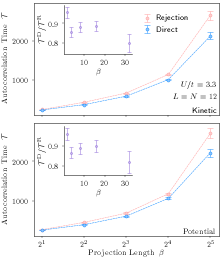

In [108]:
with plt.style.context('../IOP_large.mplstyle'):

    # Kinetic energies subplot
    fig, ax = plt.subplots(2,1,sharey=True,sharex=True,figsize=[3.083,1.9*1.905], constrained_layout=True)
    #plt.subplots_adjust(wspace=0.02)

    
    #plt.title(r"$\rm{Projection\;Length\;Dependence}$", x=0.00, pad=-14)
    
    ax[0].set_xscale("log",base=2)

    ax[0].errorbar(betas_uniform,tau_kinetic_uniform,tau_kineticErr_uniform, fmt='o',label="Rejection",color=colors[0],
                 mfc=colors_light[0],zorder=1)
    ax[0].plot(betas_uniform,tau_kinetic_uniform, ls='--', 
                 color=colors[0],zorder=1)
    ax[0].errorbar(betas_truncated,tau_kinetic_truncated,tau_kineticErr_truncated, fmt='o', 
                 label="Direct",color=colors[1],
                 mfc=colors_light[1],zorder=1)
    ax[0].plot(betas_truncated,tau_kinetic_truncated, ls='--', 
                 color=colors[1],zorder=1)
    ax[0].set_ylabel(r"$\rm{Autocorrelation\;Time}\;\; \mathcal{T}$")
    ax[0].annotate("Kinetic",(0.99,0.02),xycoords="axes fraction", ha='right')
    ax[0].annotate(r"${U}/{t} = 3.3$",(0.99,0.25),xycoords="axes fraction", ha='right')
    ax[0].annotate(r"$L=N=12$",(0.99,0.15),xycoords="axes fraction",ha='right')
    ax[0].legend(frameon=False,loc=(0.550,0.70))


    ax[1].errorbar(betas_uniform,tau_potential_uniform,tau_potentialErr_uniform, fmt='o', 
                 label="Rejection",color=colors[0],
                 mfc=colors_light[0],zorder=1)
    ax[1].plot(betas_uniform,tau_potential_uniform, ls='--', 
                 color=colors[0],zorder=1)
    ax[1].errorbar(betas_truncated,tau_potential_truncated,tau_potentialErr_truncated, fmt='o', 
                 label="Direct",color=colors[1],
                 mfc=colors_light[1],zorder=1)
    ax[1].plot(betas_truncated,tau_potential_truncated, ls='--', 
                 color=colors[1],zorder=1)
    ax[1].set_xlabel(r"$\rm{Projection\;Length}\;\;\beta$")
    ax[1].set_ylabel(r"$\rm{Autocorrelation\;Time}\;\; \mathcal{T}$")

    ax[1].annotate(r"$\rm{Potential}$",(0.99,0.02),xycoords="axes fraction", ha='right')

    # Insets kinetic energy
    left,bottom,width,height = [0.29,0.79,0.19*1.618,0.19]
    ax2 = fig.add_axes([left,bottom,width,height])

    A = tau_kinetic_truncated
    σ_A = tau_kineticErr_truncated

    B = tau_kinetic_uniform
    σ_B = tau_kineticErr_uniform

    f = np.abs(A/B)
    σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

    ax2.errorbar(betas_uniform,A/B,σ_f, fmt='o', label="Rejection",color=colors[2],ms=2, capsize=2,
                 mfc=colors_light[2],zorder=1)

    ax2.set_ylabel(r"$\mathcal{T}^{\rm{D}}/\mathcal{T}^{\rm{R}}$")
    ax2.set_xlabel(r"$\beta$")
    ax2.spines[['right', 'top']].set_visible(False)


    # Inset potential energy
    left,bottom,width,height = [0.29,0.325,0.19*1.618,0.19]
    ax3 = fig.add_axes([left,bottom,width,height])

    A = tau_potential_truncated
    σ_A = tau_potentialErr_truncated

    B = tau_potential_uniform
    σ_B = tau_potentialErr_uniform

    f = np.abs(A/B)
    σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

    ax3.errorbar(betas_uniform,A/B,σ_f, fmt='o', ms=2, capsize=2,
                 label="Rejection",color=colors[2],
                 mfc=colors_light[2],zorder=1)

    ax3.set_ylabel(r"$\mathcal{T}^{\rm{D}}/\mathcal{T}^{\rm{R}}$")
    ax3.set_xlabel(r"$\beta$")
    ax3.spines[['right', 'top']].set_visible(False)
    
    # plt.title(r"$\beta-dependence$")

    plt.savefig("../figures/pigsfli_tau_vs_beta_critical.pdf",dpi=300)